## GRIP-DATA SCIENCE AND BUSINESS ANALYTICS
### TASK 2: PREDICTION USING DECISION TREE ALGORITHM
#### AUTHOR : AIMABLE PARFAIT KAMUGISHA

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


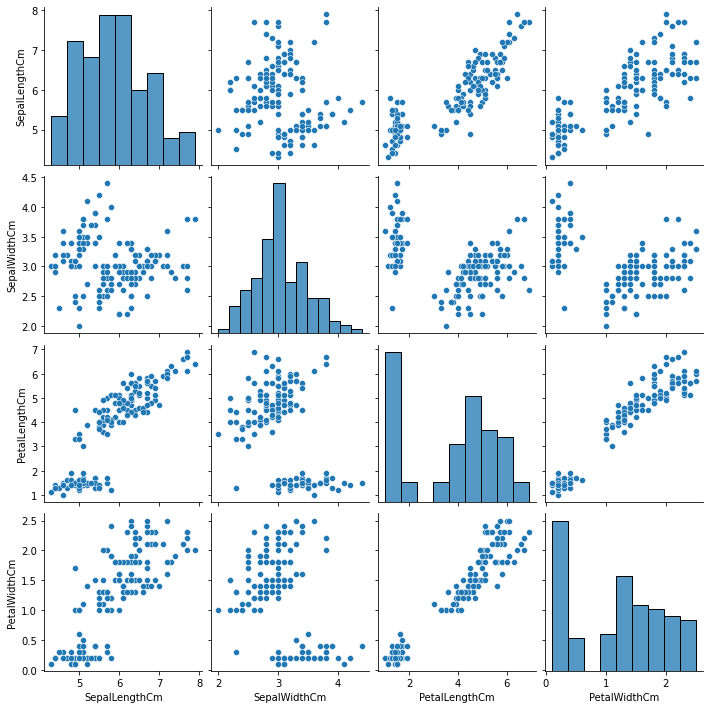

In [4]:
sns.pairplot(df.iloc[:,1:])

In [3]:
#checking the available values for each label
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
#making a copy of our dataset
df1 = df.copy()
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Transforming our labels from string type to integer type

In [5]:

df1['Species']=pd.Categorical(df['Species'].values).codes
df1['Species'].value_counts().to_frame()

,Species
0,50
1,50
2,50


### Exploratory Data Analysis

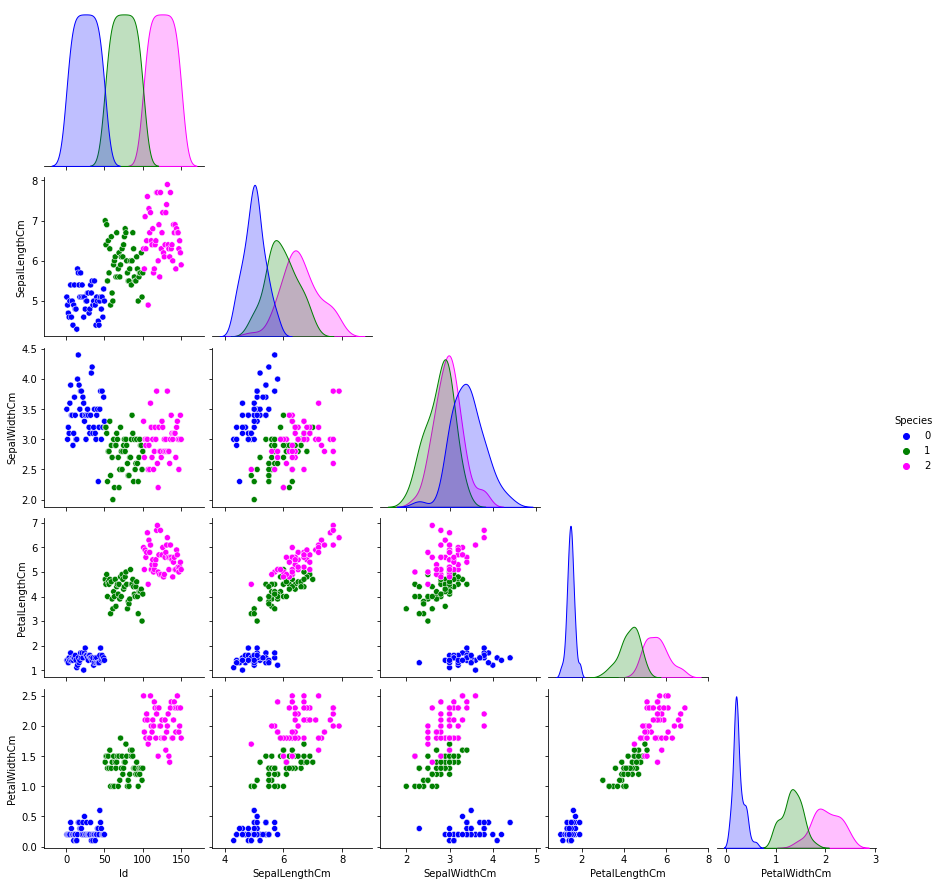

In [7]:
#Plotting the correlation between the features
sns.pairplot(df1,diag_kind='kde',hue='Species',
             palette={0:'blue',1:'green',2:'magenta'},
             corner=True);

In [22]:
#Create a correlation matrix
df_corr = df1.corr()
df_corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


#### Plotting the Correlation Matrix

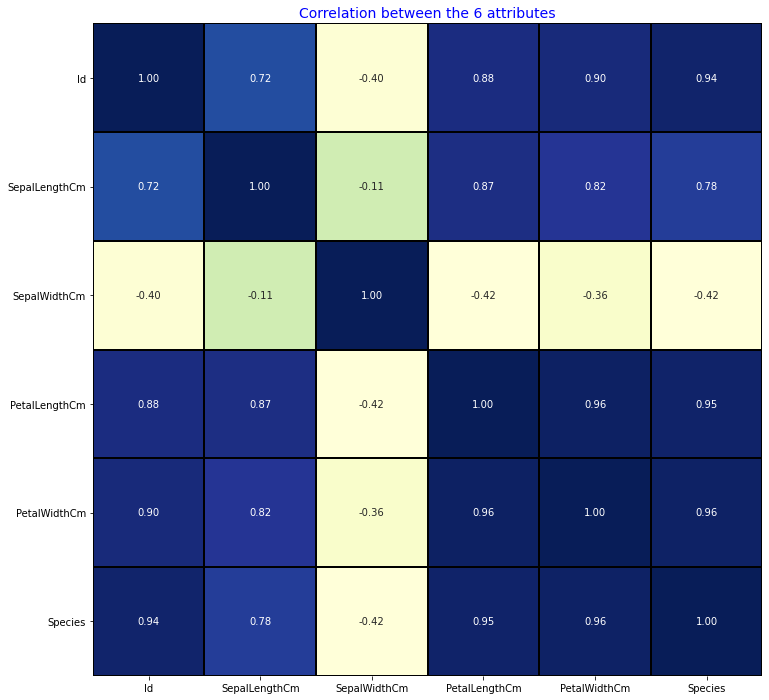

In [23]:
plt.figure(figsize=[12,12])
sns.heatmap(data=df_corr,annot=True,cbar=False,fmt=".2f",linewidths=1.5,cmap="YlGnBu",linecolor="black")
plt.yticks(rotation=0)
plt.title("Correlation between the 6 attributes",fontdict={'fontsize': 14,
                                                            'fontweight': 1,
                                                            'color': "blue"});

From the correlation matrix, we can deduct that `SepalWidthCm` is negatively correlated to other features, meaning that its values increase when the values of other features decrease.<br/>
`PetalWidthCm` is the highly correlated feature to the Species label, which means that there is a strong linear relationship between `PetalWidthCm` and `Species`.

### creating our model

In [24]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,classification_report,f1_score

In [26]:
df.shape

(150, 6)

In [69]:
#creating data and label variables
X = df1.drop('Species',axis=1)
y=df1['Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


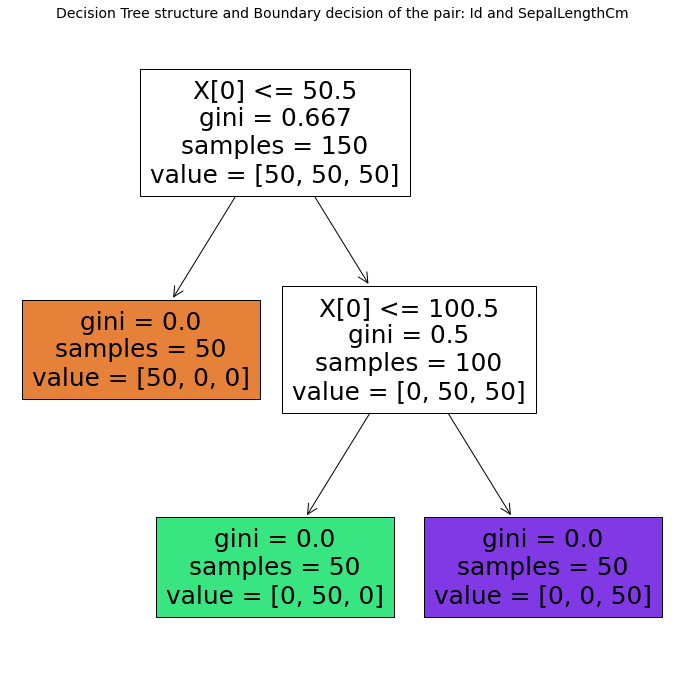

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



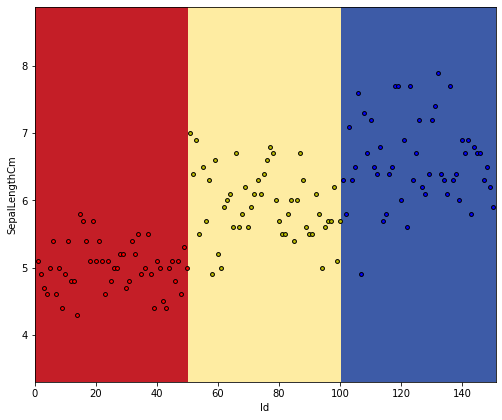

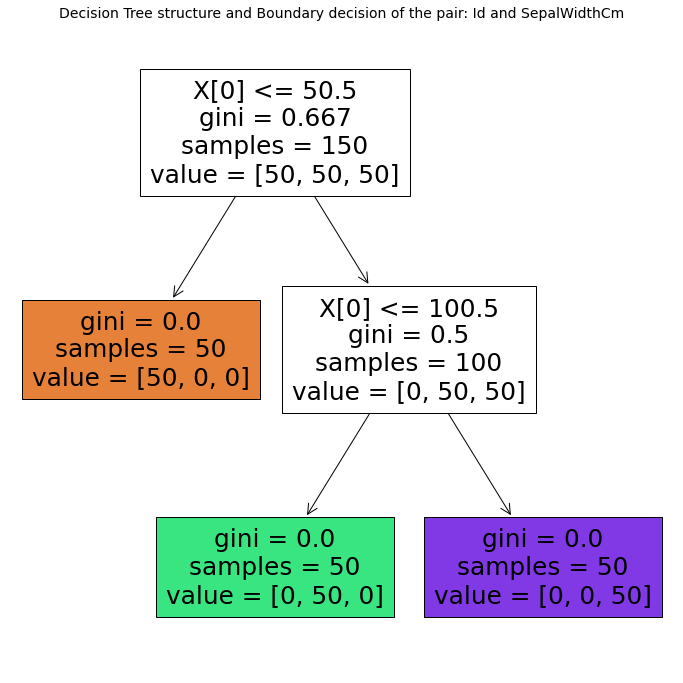

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



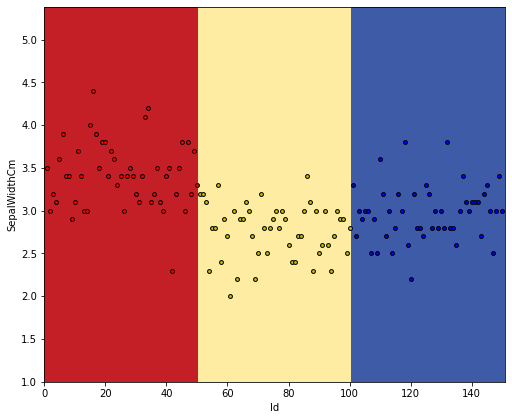

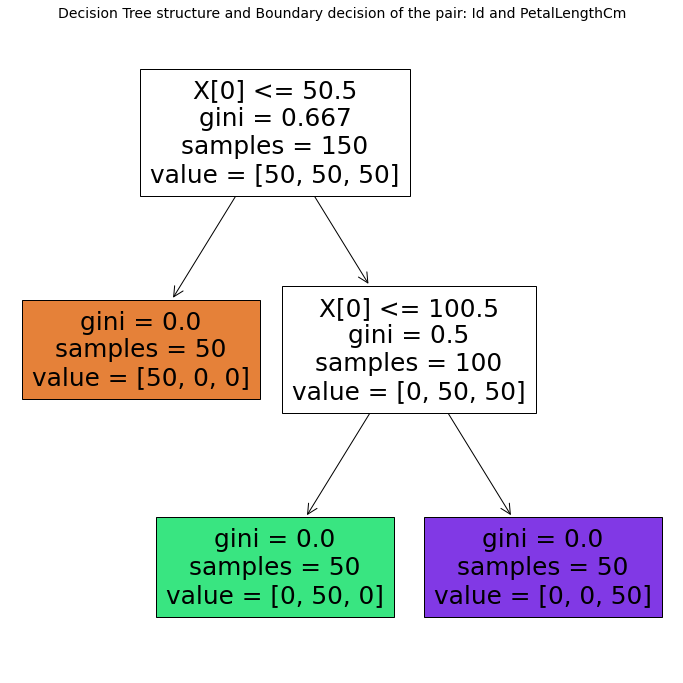

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



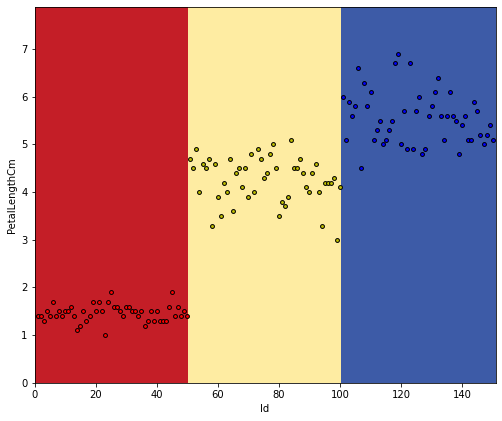

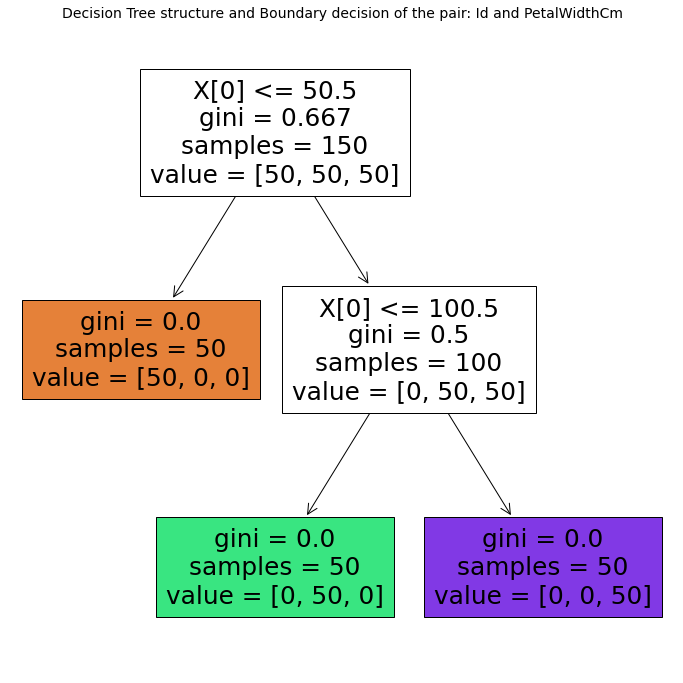

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



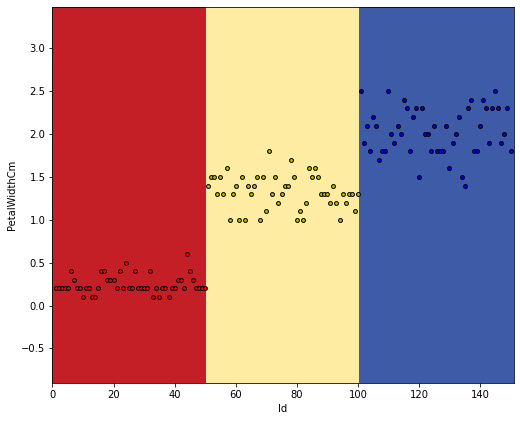

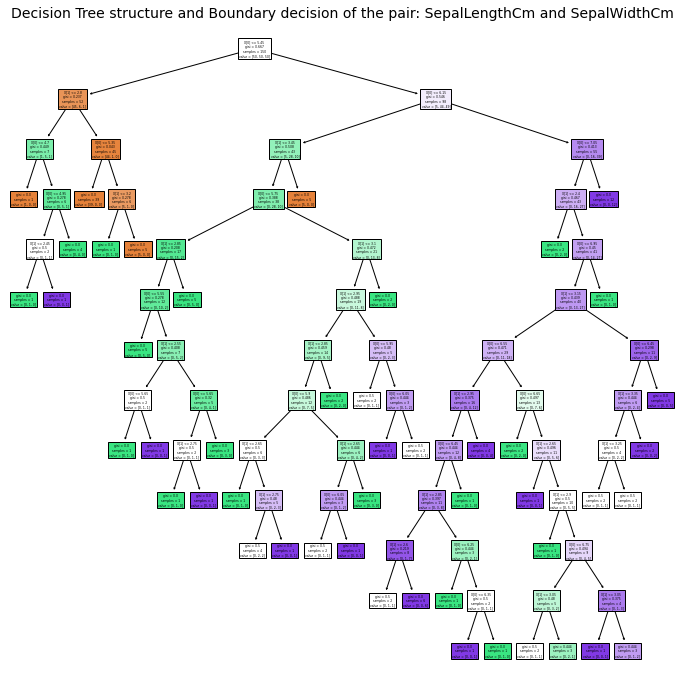

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.83      0.98      0.90        50
           2       0.98      0.80      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



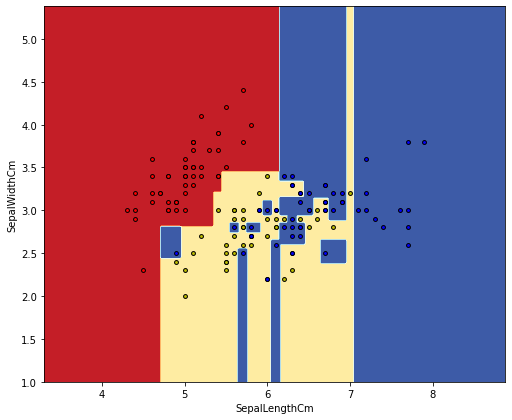

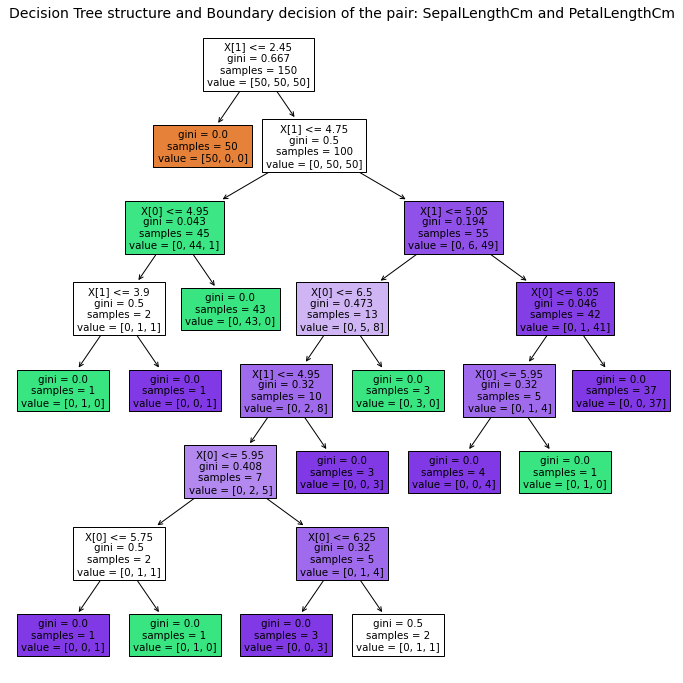

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



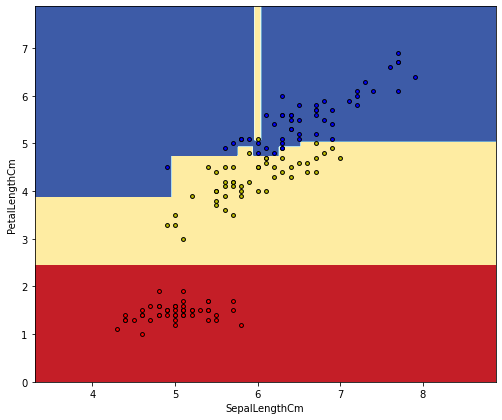

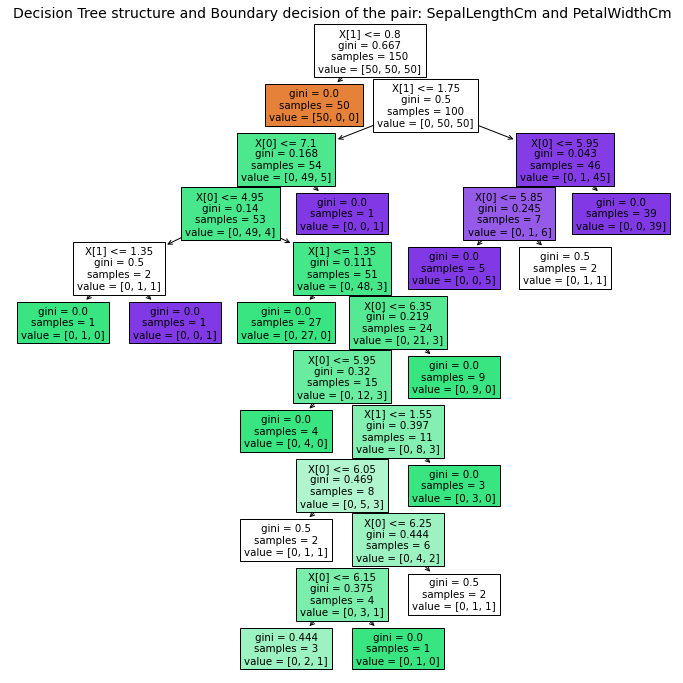

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      1.00      0.96        50
           2       1.00      0.92      0.96        50

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



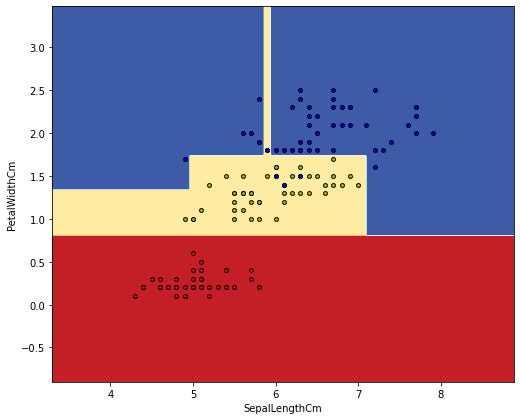

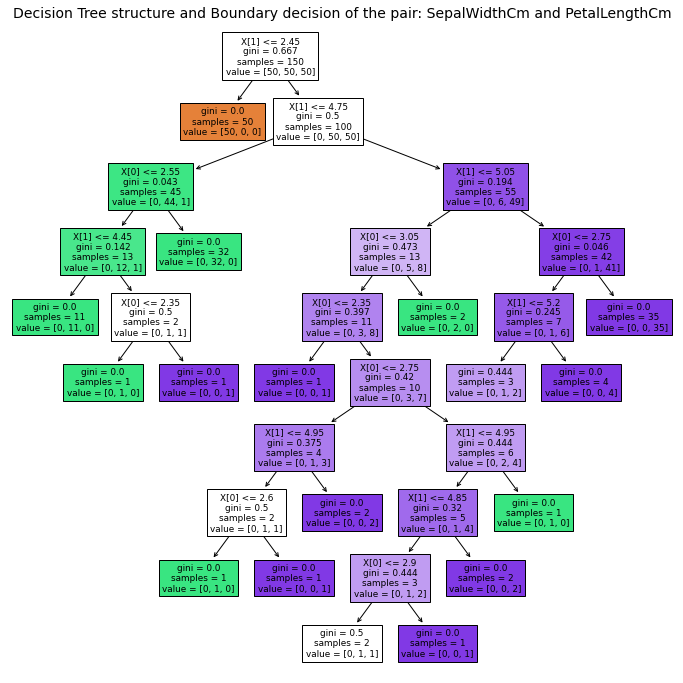

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



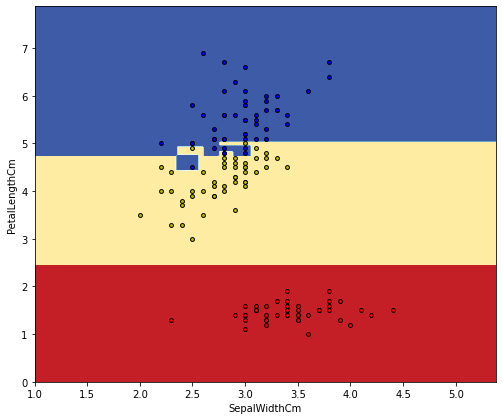

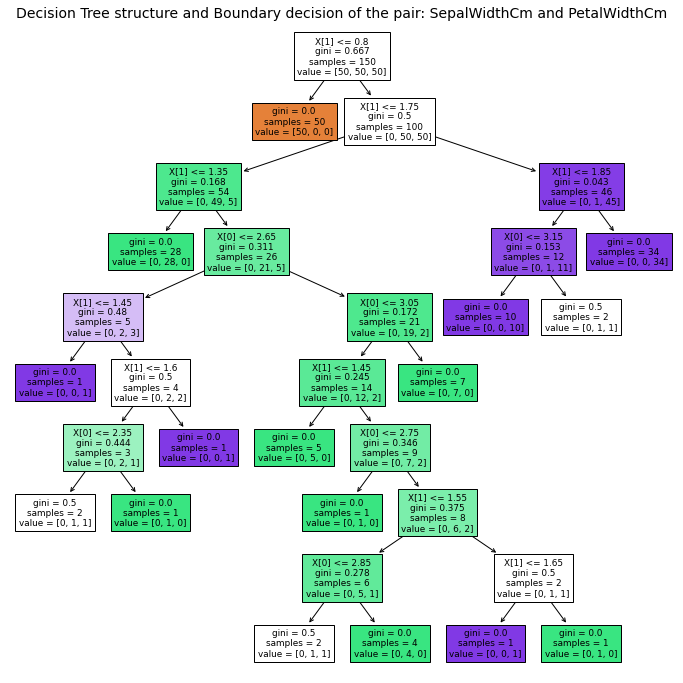

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      1.00      0.97        50
           2       1.00      0.94      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



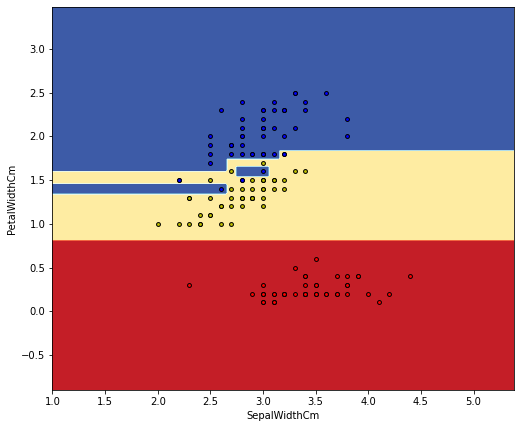

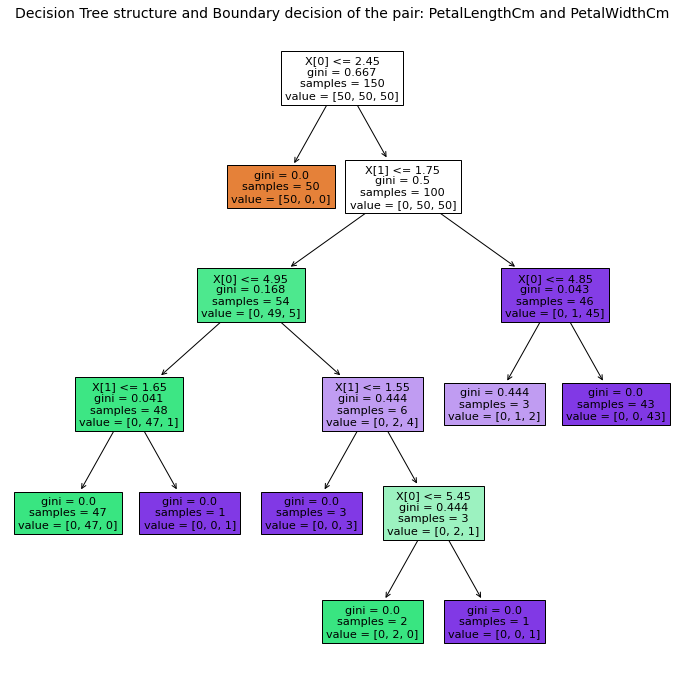

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



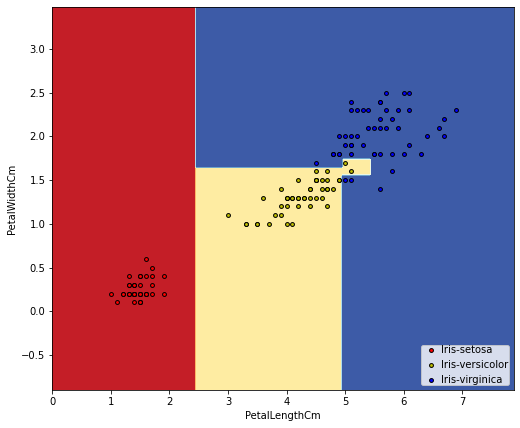

In [77]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
class_names = list(df['Species'].unique())
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0, 4],
                                [1, 2], [1, 3],[1,4],[2, 3],[2,4],[3,4]]):
    # We only take the two corresponding features
    X2 = X.iloc[:,pair]
    y = y

    # Train
    clf = DecisionTreeClassifier(random_state=42).fit(X2, y)
    #plotting our Decision tree model structure
    plt.figure(figsize=[12,12])
    plot_tree(clf,filled=True)
    plt.title(f'Decision Tree structure and Boundary decision of the pair: {X.columns[pair[0]]} and {X.columns[pair[1]]}',fontdict={'fontsize': 14,'fontweight': 1})
    plt.show()
    #let's check our classification report
    y_predicted = clf.predict(X2)
    print(classification_report(y_true=y,y_pred=y_predicted))
    # Plot the decision boundary
    plt.figure(figsize=[14,28])
    plt.subplot(5, 2, pairidx+1)

    x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
    y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(X.columns[pair[0]])
    plt.ylabel(X.columns[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        plt.scatter(X2.iloc[idx, 0], X2.iloc[idx, 1], c=color, label=class_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight");